<a href="https://colab.research.google.com/github/Coyy12/AVD-Tugas/blob/main/UTS_Supervised_metode_Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import library yang dibutuhkan**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# **Upload Dataset**

In [4]:
from google.colab import files

# Upload file CSV
uploaded = files.upload()

# Membaca dataset
df = pd.read_csv("supermarket_UTS.csv")

Saving supermarket_UTS.csv to supermarket_UTS.csv


#Load dataset supermarket_UTS.csv

In [5]:
df = pd.read_csv('supermarket_UTS.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# **Melihat informasi Data**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

# **Mengecek apakah ada missing values**

In [7]:
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


# **Pilih fitur dan target**

Disini saya  ingin memprediksi 'Total' berdasarkan 'Unit price', 'Quantity', dan 'Rating'

In [8]:
X = df[['Unit price', 'Quantity', 'Rating']]
y = df['Total']

# **Split data menjadi training dan testing**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Inisialisasi dan latih model regresi linear**

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# **Prediksi hasil dari data testing**

In [11]:
y_pred = model.predict(X_test)

# **Evaluasi model**

In [12]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 6199.31
R² Score: 0.90


1. Dengan R² = 0.90, model mampu menjelaskan sebagian besar variansi data.

2. MSE = 6199.31 menunjukkan tingkat kesalahan prediksi/

# **Visualisasi Hasil Prediksi vs Nilai Sebenarnya**

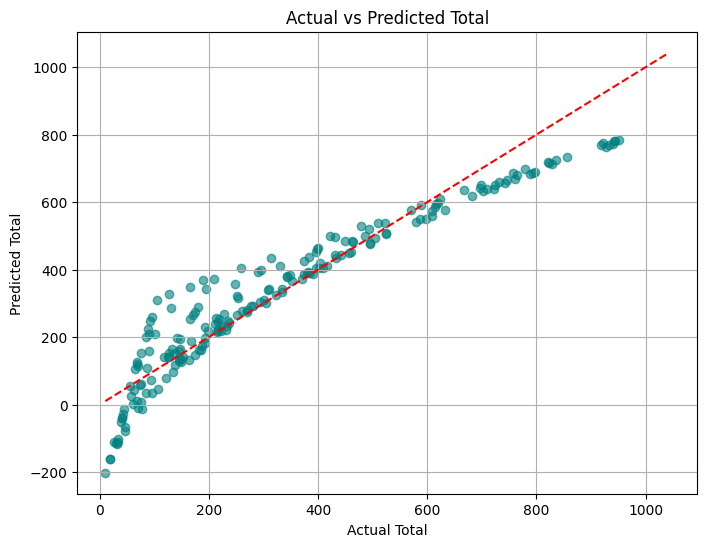

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Garis ideal prediksi
plt.xlabel("Actual Total")
plt.ylabel("Predicted Total")
plt.title("Actual vs Predicted Total")
plt.grid(True)
plt.show()

Visualisasi Actual vs Predicted Total digunakan untuk melihat akurasi model regresi. Titik-titik pada grafik menunjukkan seberapa dekat hasil prediksi model terhadap nilai sebenarnya. Semakin dekat titik ke garis merah (y = x), semakin akurat prediksinya. Grafik ini memperlihatkan bahwa model memiliki performa yang cukup baik, meskipun masih terdapat beberapa kesalahan prediksi. Secara keseluruhan, model mampu menangkap hubungan antara variabel input dan target dengan cukup baik.

# **Koefisien dari model**

In [14]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Unit price,5.793338
Quantity,58.215649
Rating,-2.794367


1. Unit Price (5.79)
  Artinya, setiap kenaikan 1 satuan harga produk akan meningkatkan nilai Total sebesar 5.79, jika variabel lain tetap.

2. Quantity (58.21)
  Merupakan koefisien terbesar, menandakan bahwa jumlah barang yang dibeli memiliki pengaruh paling besar terhadap Total. Setiap penambahan 1 unit barang akan menaikkan total sebesar 58.21.

3. Rating (-2.79)
  Koefisien negatif menunjukkan bahwa semakin tinggi rating, justru sedikit mengurangi Total. Ini bisa terjadi jika produk dengan rating tinggi biasanya lebih murah atau dibeli dalam jumlah lebih sedikit

Variabel Quantity memiliki pengaruh paling dominan terhadap nilai Total, diikuti oleh Unit Price, sedangkan Rating memiliki pengaruh negatif yang relatif kecil.